In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
repo_root = os.popen('git rev-parse --show-toplevel').read().strip()

In [3]:
data_folder = os.path.join(repo_root, 'multi-parameter-estimation', 'data')

# Get list of data directories
data_dirs = os.listdir(data_folder)
data_dirs = [d for d in data_dirs if os.path.isdir(os.path.join(data_folder, d))]
data_dirs.sort()
data_dirs

['2025-05-27--13h-42m-52s',
 '2025-05-27--13h-44m-42s',
 '2025-05-27--13h-46m-33s',
 '2025-05-27--13h-48m-25s',
 '2025-05-27--13h-50m-17s',
 '2025-05-27--13h-52m-09s',
 '2025-05-27--13h-54m-02s',
 '2025-05-27--13h-55m-55s',
 '2025-05-27--13h-57m-47s',
 '2025-05-27--13h-59m-39s']

In [4]:
def load_estimates_and_params(data_dir):
    params = pd.read_csv(os.path.join(data_folder, data_dir, "params.csv"))
    estimates = pd.read_csv(os.path.join(data_folder, data_dir, "estimators.csv"))
    estimates["data_dir"] = data_dir
    estimates["theta"] = params["theta"].values[0]
    estimates["delta_phi"] = params["delta_phi"].values[0]
    estimates["repetitions"] = params["repetitions"].values[0]
    return estimates

# Load estimates and parameters for each data directory
estimates_list = []
for data_dir in data_dirs:
    # Skip the directories with no estimates
    if not os.path.exists(os.path.join(data_folder, data_dir, "theta_delta_phi_estimates_n=40.csv")):
        continue
    estimates = load_estimates_and_params(data_dir)
    estimates_list.append(estimates)
# Concatenate all estimates into a single DataFrame
estimates_df = pd.concat(estimates_list, ignore_index=True)
estimates_df

FileNotFoundError: [Errno 2] No such file or directory: '/home/jh115/Heriot-Watt University Team Dropbox/RES_EPS_EMQL/projects/multi-parameter-estimation/multi-parameter-estimation/data/2025-05-27--13h-42m-52s/estimators.csv'

In [ ]:
# more than 1000 repetitions
estimates_df = estimates_df[estimates_df["repetitions"] > 1000]

In [ ]:
estimates_df["theta_degrees"] = np.degrees(estimates_df["theta"])
estimates_df["delta_phi_degrees"] = np.degrees(estimates_df["delta_phi"])
estimates_df

,data_dir,C,DB_H,DB_V,SB,N,theta_estimate,delta_phi_estimate,theta,delta_phi,repetitions,theta_degrees,delta_phi_degrees
0,2025-05-23--17h-24m-53s,2.00,38.0,0.0,0.00,40.0,0.267378,1.570796,0.000000,0,5000,0.0,0.0
1,2025-05-23--17h-24m-53s,0.75,39.0,0.0,0.25,40.0,0.142615,1.040678,0.000000,0,5000,0.0,0.0
2,2025-05-23--17h-24m-53s,1.00,39.0,0.0,0.00,40.0,0.142615,1.570796,0.000000,0,5000,0.0,0.0
3,2025-05-23--17h-24m-53s,0.75,39.0,0.0,0.25,40.0,0.142615,1.040678,0.000000,0,5000,0.0,0.0
4,2025-05-23--17h-24m-53s,1.00,39.0,0.0,0.00,40.0,0.142615,1.570796,0.000000,0,5000,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
11470,2025-05-23--19h-08m-07s,3.75,0.0,196.0,0.25,200.0,3.040791,1.314461,3.141593,0,5000,180.0,0.0
11471,2025-05-23--19h-08m-07s,3.50,0.0,196.0,0.50,200.0,3.040791,1.204440,3.141593,0,5000,180.0,0.0
11472,2025-05-23--19h-08m-07s,2.75,0.0,197.0,0.25,200.0,3.141593,1.273781,3.141593,0,5000,180.0,0.0
11473,2025-05-23--19h-08m-07s,4.25,0.0,195.0,0.75,200.0,2.998978,1.167712,3.141593,0,5000,180.0,0.0


In [ ]:
# only where repetitions > 1000
estimates_df = estimates_df[estimates_df["repetitions"] > 1000]

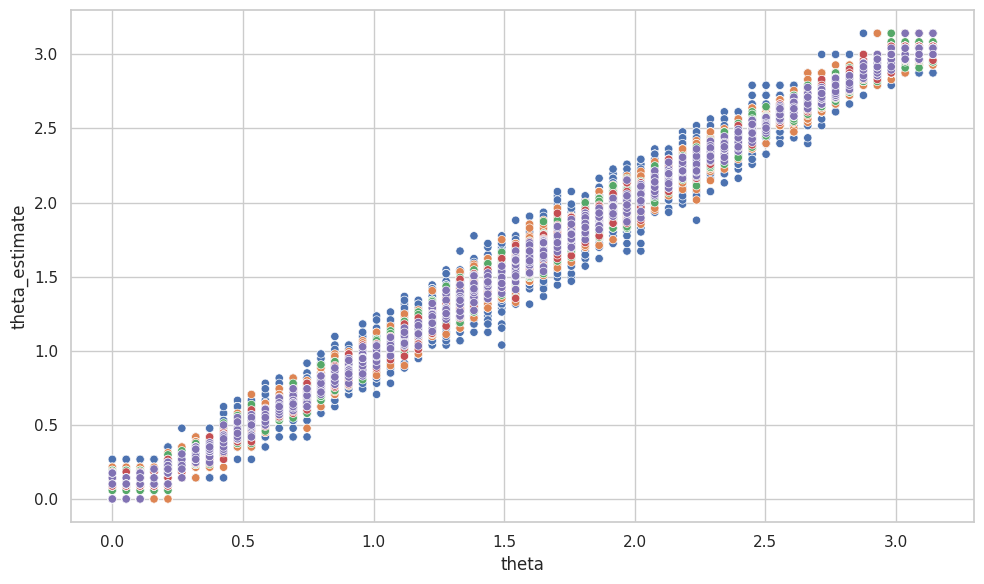

In [ ]:
# plot the theta estimate against theta

sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
sns.scatterplot(data=estimates_df, x="theta", y="theta_estimate", hue="N", palette="deep")

# no legend
plt.legend([], [], frameon=False)

plt.tight_layout()
file_name = os.path.join(repo_root, "multi-parameter-estimation", "post-processing", "theta_estimate_vs_true_theta.png")
plt.savefig(file_name, dpi=300)
plt.show()

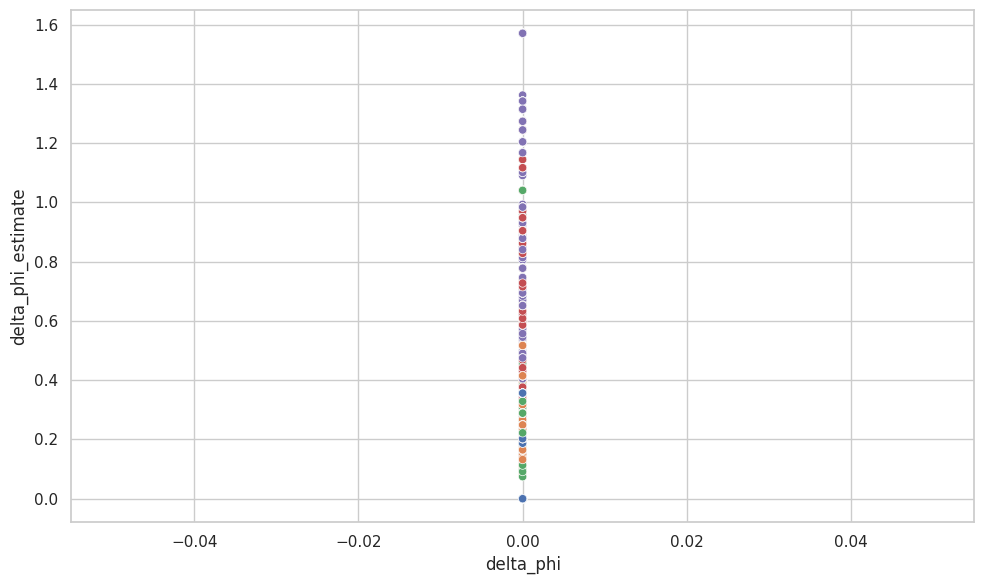

In [ ]:
# plot the theta estimate against theta
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
sns.scatterplot(data=estimates_df, x="delta_phi", y="delta_phi_estimate", hue="N", palette="deep")

# no legend
plt.legend([], [], frameon=False)

plt.tight_layout()

# save the figure
file_name = os.path.join(repo_root, "multi-parameter-estimation", "post-processing", "delta_phi_estimate_vs_true_delta_phi.png")
plt.savefig(file_name, dpi=300)
plt.show()

In [ ]:
estimates_summary_df = estimates_df.groupby(["data_dir", "N"]).agg({
    "theta_estimate": ["mean", "std", "var"],
    "delta_phi_estimate": ["mean", "std", "var"],
    "theta": ["mean"],
    "delta_phi": ["mean"]
}).reset_index().rename(columns={"data_dir": "Data Directory"})
estimates_summary_df

Data Directory      N theta_estimate                      \
                                              mean       std       var   
0    2025-05-23--17h-24m-53s   40.0       0.114644  0.070843  0.005019   
1    2025-05-23--17h-24m-53s   80.0       0.095920  0.079248  0.006280   
2    2025-05-23--17h-24m-53s  120.0       0.095302  0.072789  0.005298   
3    2025-05-23--17h-24m-53s  160.0       0.091671  0.068136  0.004643   
4    2025-05-23--17h-24m-53s  200.0       0.078949  0.079813  0.006370   
..                       ...    ...            ...       ...       ...   
295  2025-05-23--19h-08m-07s   40.0       3.030757  0.071034  0.005046   
296  2025-05-23--19h-08m-07s   80.0       3.061883  0.078068  0.006095   
297  2025-05-23--19h-08m-07s  120.0       3.053559  0.058792  0.003456   
298  2025-05-23--19h-08m-07s  160.0       3.051126  0.052369  0.002743   
299  2025-05-23--19h-08m-07s  200.0       3.054404  0.052693  0.002777   

    delta_phi_estimate                         theta delta_phi  
                  mean       std       var      mean      mean  
0             1.375879  0.282838  0.079997  0.000000       0.0  
1             1.336007  0.269212  0.072475  0.000000       0.0  
2             1.328347  0.231644  0.053659  0.000000       0.0  
3             1.332865  0.205551  0.042251  0.000000       0.0  
4             1.273656  0.184069  0.033881  0.000000       0.0  
..                 ...       ...       ...       ...       ...  
295           1.421301  0.235880  0.055640  3.141593       0.0  
296           1.409902  0.222990  0.049725  3.141593       0.0  
297           1.367834  0.188903  0.035684  3.141593       0.0  
298           1.381757  0.191148  0.036538  3.141593       0.0  
299           1.347181  0.163626  0.026773  3.141593       0.0  

[300 rows x 10 columns]

In [ ]:
estimates_summary_df["2_n_var"] = estimates_summary_df["N"] * 2 * estimates_summary_df["theta_estimate"]["var"]
estimates_summary_df["theta_error"] = estimates_summary_df["theta_estimate"]["mean"] - estimates_summary_df["theta"]["mean"]
estimates_summary_df["root_n_theta_error"] = np.sqrt(estimates_summary_df["N"]) * estimates_summary_df["theta_error"]
estimates_summary_df

Data Directory      N theta_estimate                      \
                                              mean       std       var   
0    2025-05-23--17h-24m-53s   40.0       0.114644  0.070843  0.005019   
1    2025-05-23--17h-24m-53s   80.0       0.095920  0.079248  0.006280   
2    2025-05-23--17h-24m-53s  120.0       0.095302  0.072789  0.005298   
3    2025-05-23--17h-24m-53s  160.0       0.091671  0.068136  0.004643   
4    2025-05-23--17h-24m-53s  200.0       0.078949  0.079813  0.006370   
..                       ...    ...            ...       ...       ...   
295  2025-05-23--19h-08m-07s   40.0       3.030757  0.071034  0.005046   
296  2025-05-23--19h-08m-07s   80.0       3.061883  0.078068  0.006095   
297  2025-05-23--19h-08m-07s  120.0       3.053559  0.058792  0.003456   
298  2025-05-23--19h-08m-07s  160.0       3.051126  0.052369  0.002743   
299  2025-05-23--19h-08m-07s  200.0       3.054404  0.052693  0.002777   

    delta_phi_estimate                         theta delta_phi   2_n_var  \
                  mean       std       var      mean      mean             
0             1.375879  0.282838  0.079997  0.000000       0.0  0.401496   
1             1.336007  0.269212  0.072475  0.000000       0.0  1.004848   
2             1.328347  0.231644  0.053659  0.000000       0.0  1.271579   
3             1.332865  0.205551  0.042251  0.000000       0.0  1.485619   
4             1.273656  0.184069  0.033881  0.000000       0.0  2.548061   
..                 ...       ...       ...       ...       ...       ...   
295           1.421301  0.235880  0.055640  3.141593       0.0  0.403664   
296           1.409902  0.222990  0.049725  3.141593       0.0  0.975126   
297           1.367834  0.188903  0.035684  3.141593       0.0  0.829555   
298           1.381757  0.191148  0.036538  3.141593       0.0  0.877613   
299           1.347181  0.163626  0.026773  3.141593       0.0  1.110630   

    theta_error root_n_theta_error  
                                    
0      0.114644           0.725072  
1      0.095920           0.857933  
2      0.095302           1.043985  
3      0.091671           1.159562  
4      0.078949           1.116510  
..          ...                ...  
295   -0.110836          -0.700985  
296   -0.079710          -0.712948  
297   -0.088034          -0.964361  
298   -0.090467          -1.144328  
299   -0.087189          -1.233035  

[300 rows x 13 columns]

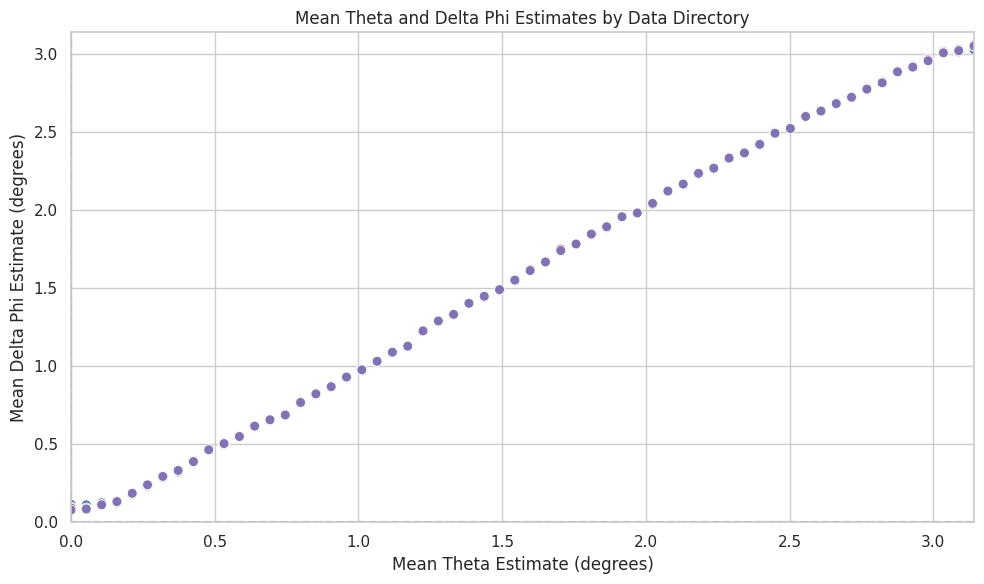

In [ ]:
# plot the means as a scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(data=estimates_summary_df, x=("theta", "mean"),
                y=("theta_estimate", "mean"),
                hue="N", palette="deep", s=50)
plt.title("Mean Theta and Delta Phi Estimates by Data Directory")
plt.xlabel("Mean Theta Estimate (degrees)")
plt.ylabel("Mean Delta Phi Estimate (degrees)")
plt.axhline(0, color='gray', linestyle='--')
plt.axvline(0, color='gray', linestyle='--')
plt.xlim(0, np.pi)
plt.ylim(0, np.pi)
# no legend
plt.legend([], [], frameon=False)
plt.tight_layout()
file_name = os.path.join(repo_root, "multi-parameter-estimation", "post-processing", "mean_theta_delta_phi_estimates_by_data_dir.png")
plt.savefig(file_name, dpi=300)
plt.show()

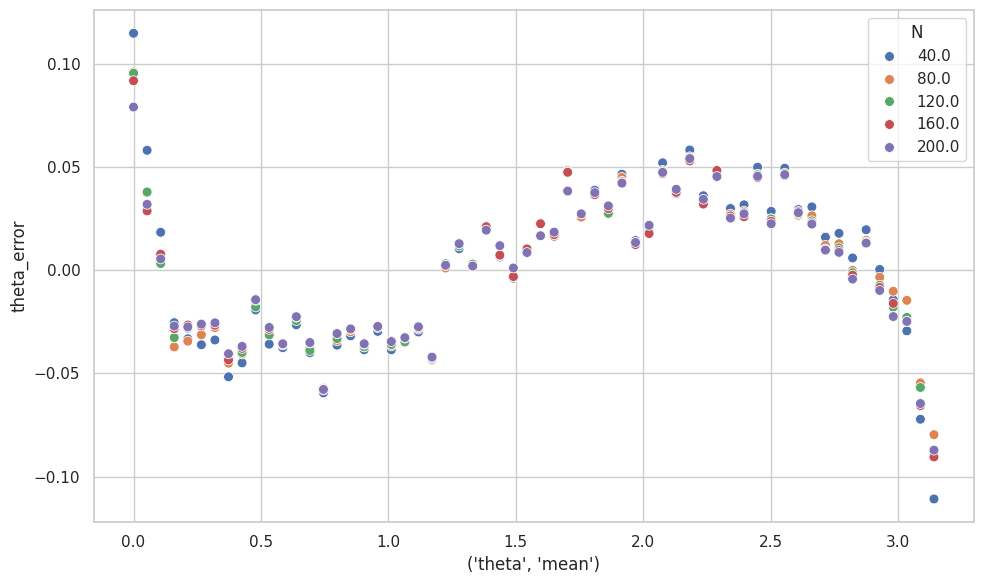

In [ ]:

plt.figure(figsize=(10, 6))
sns.scatterplot(data=estimates_summary_df, x=("theta", "mean"),
                y=("theta_error"),
                hue="N", palette="deep", s=50)


plt.tight_layout()
file_name = os.path.join(repo_root, "multi-parameter-estimation", "post-processing", "mean_theta_error_by_data_dir.png")
plt.savefig(file_name, dpi=300)
plt.show()

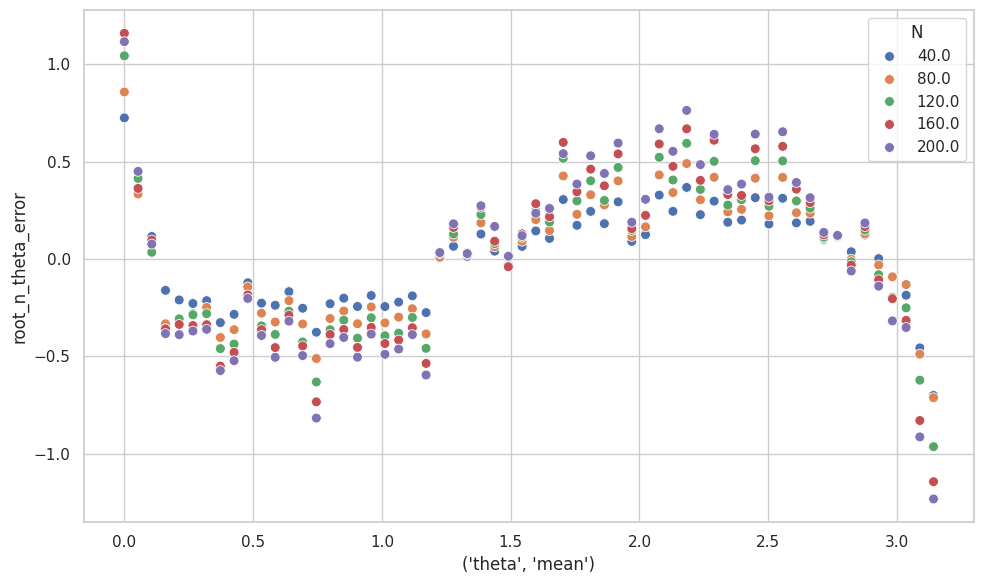

In [ ]:

plt.figure(figsize=(10, 6))
sns.scatterplot(data=estimates_summary_df, x=("theta", "mean"),
                y=("root_n_theta_error"),
                hue="N", palette="deep", s=50)


plt.tight_layout()
file_name = os.path.join(repo_root, "multi-parameter-estimation", "post-processing", "mean_theta_error_by_data_dir.png")
plt.savefig(file_name, dpi=300)
plt.show()

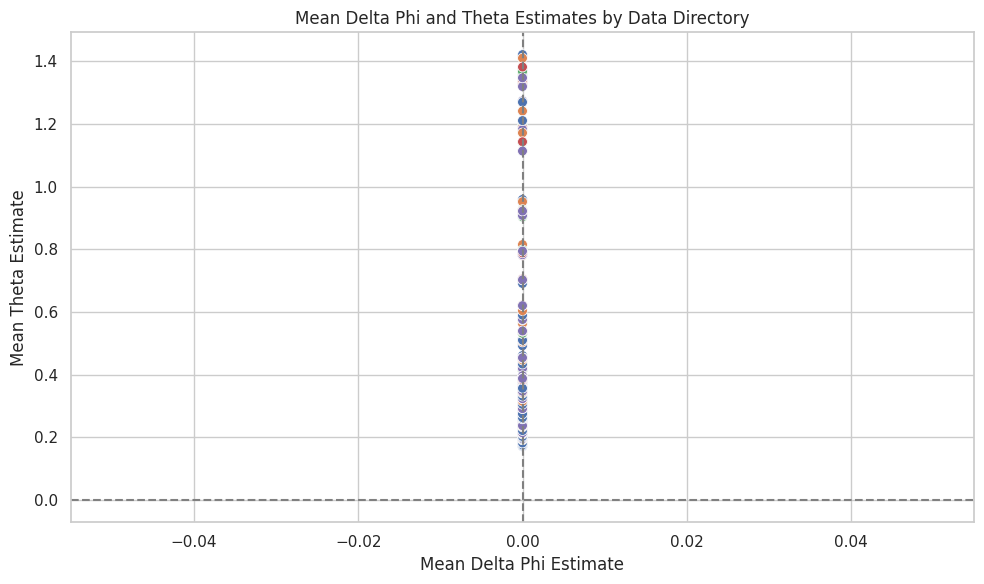

In [ ]:
# plot the means as a scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(data=estimates_summary_df, x=("delta_phi", "mean"),
                y=("delta_phi_estimate", "mean"),
                hue=estimates_summary_df["N"].astype(str),
                palette="deep", s=50)
plt.title("Mean Delta Phi and Theta Estimates by Data Directory")
plt.xlabel("Mean Delta Phi Estimate")
plt.ylabel("Mean Theta Estimate")
plt.axhline(0, color='gray', linestyle='--')
plt.axvline(0, color='gray', linestyle='--')

# no legend
plt.legend([], [], frameon=False)
plt.tight_layout()
file_name = os.path.join(repo_root, "multi-parameter-estimation", "post-processing", "mean_delta_phi_theta_estimates_by_data_dir.png")
plt.savefig(file_name, dpi=300)
plt.show()

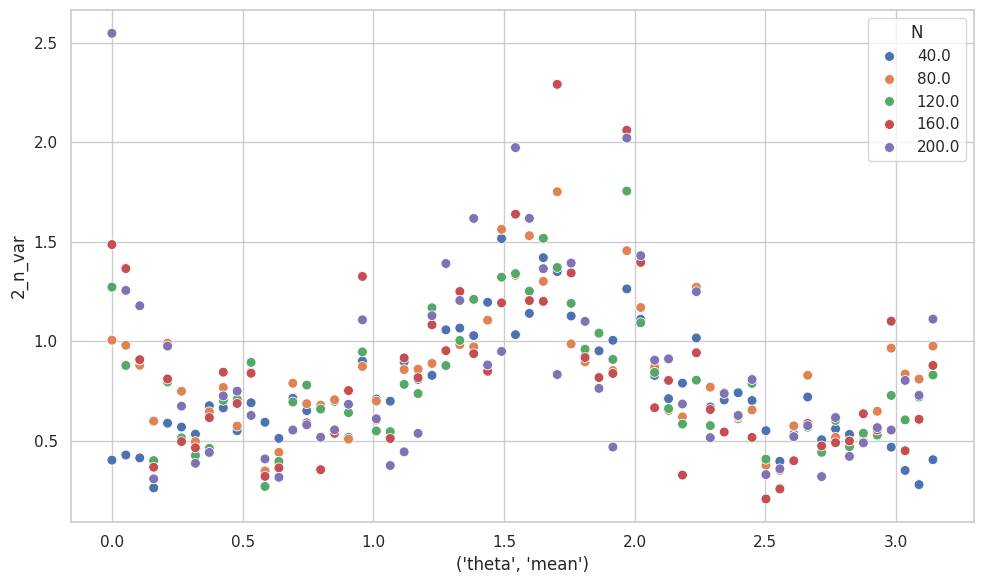

In [ ]:
# plot the variances against the true value of theta as a scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(data=estimates_summary_df, x=("theta", "mean"), y=("2_n_var"),
                hue=estimates_summary_df["N"].astype(str),
                palette="deep", s=50)


plt.tight_layout()
file_name = os.path.join(repo_root, "multi-parameter-estimation", "post-processing", "variance_theta_delta_phi_estimates_by_data_dir.png")
plt.savefig(file_name, dpi=300)
plt.show()